# Analyzing models with

<img src="https://raw.githubusercontent.com/biosustain/cameo/gh-pages/cameo_logo.png" style="height:50px;text-align:left; margin-left: 0px;"/>

**c**omputer **a**ided **m**etabolic **e**ngineering and **o**ptimization

**cameo** uses and extends the model data structures defined by [cobrapy](https://opencobra.github.io/cobrapy/), our favorite **CO**nstraints-**B**ased **R**econstruction and **A**nalysis tool for **Py**thon. **cameo** is thus 100% compatible with **cobrapy**. For efficiency reasons though **cameo** implements its own analysis methods that take advantage of a more advanced solver interface.


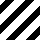
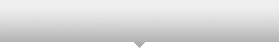
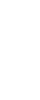
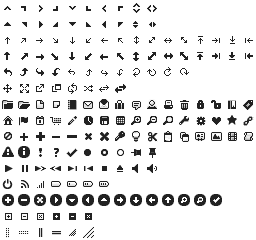
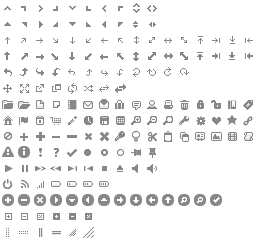
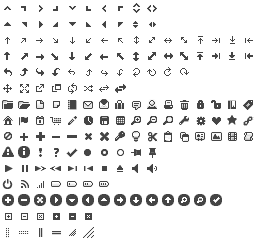
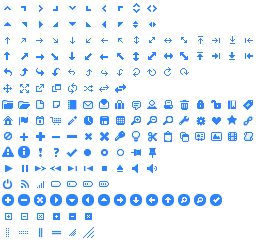
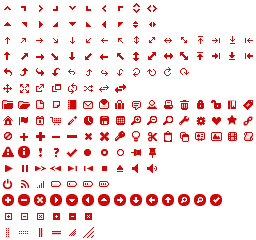
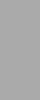
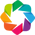
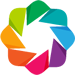
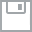
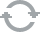
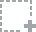
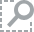
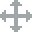
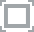
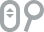

In [1]:
from cameo import load_model
model = load_model("iJO1366")

## Flux Variability Analysis

Flux variability analysis (FVA) enables the computation of lower and upper bounds of reaction fluxes.

In [3]:
from cameo import flux_variability_analysis

In [5]:
flux_variability_analysis(model, reactions=[model.reactions.PGI, model.reactions.EX_glc_lp_e_rp_])

lower_bound  upper_bound
EX_glc_lp_e_rp_       -10.00    -0.134043
PGI                  -254.35   241.850000

One very useful application of FVA is determining if alternative optimal solution exist.

In [7]:
flux_variability_analysis(model, reactions=[model.reactions.PGI, model.reactions.EX_glc_lp_e_rp_],
                          fraction_of_optimum=1.)

lower_bound  upper_bound
EX_glc_lp_e_rp_   -10.000000   -10.000000
PGI                 5.918065     5.918065

Phenotpic Phase Plane
--------------------

In [ ]:
model.reactions.EX_o2_lp_e_rp_.lower_bound = -10
result = analysis.phenotypic_phase_plane(model, 
                                         variables=[model.reactions.BiomassEcoli],
                                         objective=model.reactions.EX_succ_lp_e_rp_,
                                         points=10)

In [ ]:
result.plot(height=400)

In [ ]:
result.data_frame